# Foundations of computational Physics 
PH1050 (May-June 2022)

Web Resource: 
1. https://docs.python.org/3.7/tutorial/index.html
2. https://developers.google.com/edu/python

## Numerical Integration 

web resource: https://www.math.ubc.ca/~pwalls/math-python/integration/integrals/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Three simple methods

##### Riemann Sum : left, right and mid-point 

Example : Compute (numerically) the approximate area under the curve given by the function (see below) between the limits [0, 5]. Cosider 10 subdivisions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

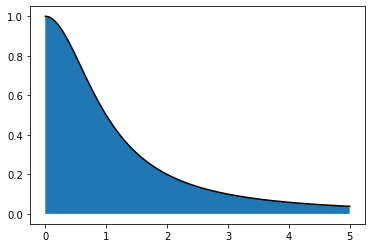

In [3]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 100
# x-vector
x=np.linspace(a, b, N+1)
# y-vector
y=f(x)
# plot the function
plt.plot(x, y, 'k')
plt.fill_between(x, y)
plt.show()

In [4]:
# Rienmann Sum using the three methods 
import numpy as np
def riemann_sum(f, a, b, N, method):
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)
    #print x
    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

In [5]:
#test
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
riemann_sum(f, a, b, N, 'midpoint')

1.373543428316664

In [6]:
#test (rectified)
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 100
print(riemann_sum(f, a, b, N, 'midpoint'))

1.3734023078241717


In [7]:
# change of methods, fixed N
method_list=['midpoint', 'left', 'right']
for method in method_list:
    int_riemann_sum=riemann_sum(f, a, b, N, method)
    print('method:%s,' %method, 'int_riemann_sum:%2.6f' %int_riemann_sum) # %s (string), %f (float), %d (integer)

method:midpoint, int_riemann_sum:1.373402
method:left, int_riemann_sum:1.397436
method:right, int_riemann_sum:1.349359


In [8]:
# known integral : Int[1/(1+x**2),x]=ArcTan(x)
int_exact=lambda x : np.arctan(x) # note the use of evalf
print(int_exact(5)-int_exact(0))

1.373400766945016


In [9]:
# comparison with exact derivative values: error 
def err_num_int(f, a, b, N, method):
    approx_int_val=riemann_sum(f, a, b, N, method)
    exact_int_val=int_exact(b)-int_exact(a)
    err_val=np.abs(exact_int_val-approx_int_val)
    return err_val

In [10]:
# change of methods, fixed step size 
method_list=['midpoint', 'left', 'right']
for method in method_list:
    err_val=err_num_int(f, a, b, N, method)
    print('method:%s,' %method, 'err_val:%2.6f' %err_val) 

method:midpoint, err_val:0.000002
method:left, err_val:0.024035
method:right, err_val:0.024042


#### Note: Midpoint method evaluates the integral closer to the expected value. 

Example : Compute (numerically) the approximate area under the curve given by the function (see below) between the limits [0, 5]. Assume different N values.

In [11]:
# changing step size, one method 
N_list=10**np.arange(1, 4, 1)
for N in N_list:
    approx_int_val=riemann_sum(f, a, b, N, 'left')
    exact_int_val=int_exact(b)-int_exact(a)
    err_val=np.abs(exact_int_val-approx_int_val)
    print('N=%d,' %N, 'approx_int_val:%2.6f,' %approx_int_val, 'err_val:%2.6f' %err_val)

N=10, approx_int_val:1.613489, err_val:0.240088
N=100, approx_int_val:1.397436, err_val:0.024035
N=1000, approx_int_val:1.375805, err_val:0.002404


In [ ]:
# changing step size, one method 
N_list=10**np.arange(1, 4, 1)
for N in N_list:
    approx_int_val=riemann_sum(f, a, b, N, 'right')
    exact_int_val=int_exact(b)-int_exact(a)
    err_val=np.abs(exact_int_val-approx_int_val)
    print('N=%d,' %N, 'approx_int_val:%2.6f,' %approx_int_val, 'err_val:%2.6f' %err_val)

In [ ]:
# changing step size, one method 
N_list=10**np.arange(1, 4, 1)
for N in N_list:
    approx_int_val=riemann_sum(f, a, b, N, 'midpoint')
    exact_int_val=int_exact(b)-int_exact(a)
    err_val=np.abs(exact_int_val-approx_int_val)
    print('N=%d,' %N, 'approx_int_val:%2.14f,' %approx_int_val, 'err_val:%2.6f' %err_val)

##### Trapezoid Rule: TRY Yourselves 

##### Simpson's Rule: Try Yourselves 

Important Note : It can be explicitly shown that the error in a Riemann sum is inversely proportional to the size of the partition N (more precisely for left/right point sums) and the trapezoid rule is inversely proportional to N^2. The error with Simpson's rule is even better as the error is inversely proportional to N^4. 

Explore error bounds associated with each method (see the web resource link above.)

### using scipy.intergrate 

Alternatively, you may use the SciPy functions scipy.integrate.cumtrapz and scipy.integrate.simps functions for the trape-zoidal and Simpsons methods.

## Ordinary Differetial Equations
Web-resource: https://secure.math.ubc.ca/~pwalls/math-python/differential-equations/first-order/

### Euler method

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

#### Example: Solve y'=y for t in [0, 2] with y(t=0)=1.

Text(0.5, 1.0, "Solution of $y'=y , y(0)=1$")

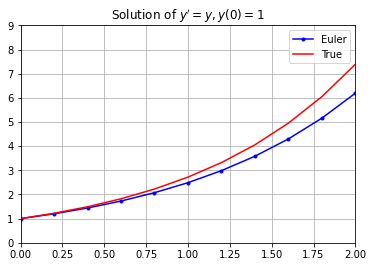

In [15]:
t = np.linspace(0,2,11)
y0 = 1
f = lambda y, t : y
y = odeEuler(f,y0,t)
y_true = np.exp(t)
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=1$")

In [ ]:
#vary the steps
for N in [10, 20]:
    t = np.linspace(0,2,N+1)
    y0 = 1
    def dy_dt(y, t):
        return y
    y = odeEuler(dy_dt,y0,t)
    y_true = np.exp(t)
    plt.plot(t, y, 'b.-', t,y_true,'r-')
    plt.legend(['Euler','True'])
    plt.axis([0,2,0,9])
    plt.grid(True)
    plt.title("Solution of $y'=y , y(0)=1$")

Note: While, large N (smaller step) reduces errors, it also enhances computation load.

### scipy.integrate.odeint

In [16]:
from scipy.integrate import odeint

Text(0.5, 1.0, "Solution of $y'=y , y(0)=1$")

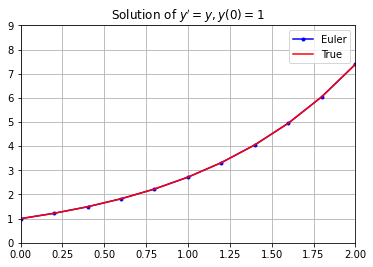

In [17]:
t = np.linspace(0,2,11)
y0 = 1
def dy_dt(y, t):
    return y
y = odeint(dy_dt, y0, t) # 'odeint' replaces 'odeEuler'
y_true = np.exp(t)
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=1$")

### System of equations / Second order differential Equations

#### Example: Solve x''(t)=-x(t) for t in [0, 10]

Note: A second order differetial equation, in order to be solved using 'odeint' must be converted into two first order equations e.g. x''(t)=-x(t) can be written as x'(t)=v and v'(t)=-x(t).

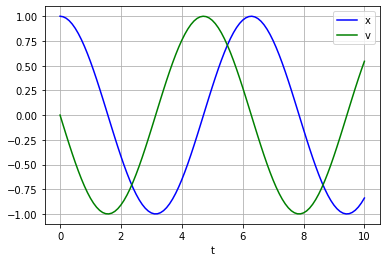

In [18]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 101)
def uhar_osc(y, t):
    x, v = y # Here y is a vector such that x=y[0] and v=y[1]
             # This function should return [x', v']
    dydt = [v, -x]
    return dydt
from scipy.integrate import odeint
y0 = [1.0, 0.0]
sol = odeint(uhar_osc, y0, t)
plt.plot(t, sol[:, 0], 'b', label='x')
plt.plot(t, sol[:, 1], 'g', label='v')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

Alternatively, a more abstract definition of derivatives can be introduced. (see below)

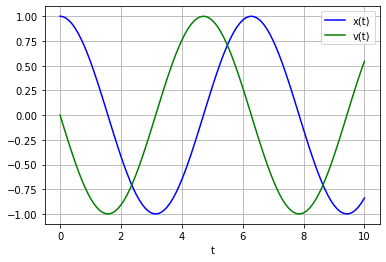

In [19]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 101)
def uhar_osc(y, t):
    # Here y is a vector such that x=y[0] and v=y[1]. This function should return [x', v']
    return [y[1], -y[0]]
from scipy.integrate import odeint
y0 = [1.0, 0.0]
sol = odeint(uhar_osc, y0, t)
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

### Loading/saving a data file in python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### np.loadtxt()

In [ ]:
loc='/Users/chandra/Documents/mycourses/PH1050_2021a/data/'
file_name='varBRSE.dat'
data=np.loadtxt(loc+file_name)

In [ ]:
f=data[:,0]
Sn=data[:,1]
plt.loglog(f, Sn, 'k-.')
plt.xlabel('f')
plt.ylabel('Sn(f)')
plt.title('Noise Power Spectral Density')
plt.legend(['LIGO'])

#### np.savetxt()

In [ ]:
Sn2=Sn**2
out_file_name='Sn2.dat'
np.savetxt(loc+out_file_name, (f, Sn, Sn2))